# Notebook imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import boston_valuation as vals

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # cm stands for colormap

from sympy import symbols, diff

import math

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

%matplotlib inline

# Example 1 - A simple cost function

## $f(x)=x^2+x+1$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

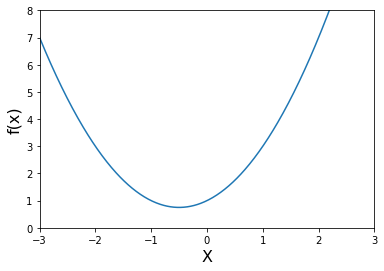

In [4]:
# plot the Data
plt.xlim([-3, 3])
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize =16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivatives


In [5]:
def df(x):
    return 2*x +1

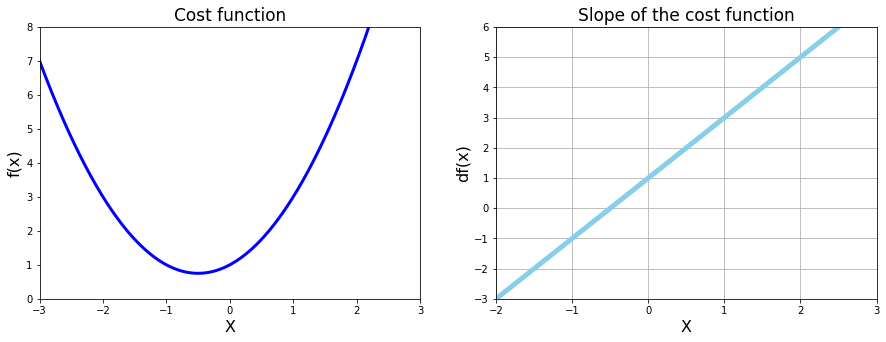

In [6]:
# plot function and derivative side by side

plt.figure(figsize=[15,5] )

# Chart 1: Cost function
plt.subplot(1, 2, 1)

plt.xlim([-3, 3])
plt.ylim(0, 8)

plt.title('Cost function', fontsize = 17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize =16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3)

#Chart 2: derivative function

plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize = 17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize =16)
plt.grid()
plt.xlim([-2, 3])
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

## Python Loops & Gradient Descent

In [7]:
#Python For Loop
for n in range(6):
    print('Hello World', n)
print('End of loop')

Hello World 0
Hello World 1
Hello World 2
Hello World 3
Hello World 4
Hello World 5
End of loop


In [8]:
#python while loop
n = 0
while n < 5:
    print('Hello World', n)
    n+=1
print('End of loop')

Hello World 0
Hello World 1
Hello World 2
Hello World 3
Hello World 4
End of loop


In [9]:
#Gradient Descent
new_x = 3 #Starting point
previous_x = 0 #Starting point 10th value for loop
step_multiplier = 0.1 #Specify learning rate or gamma
precision = 0.0001

x_list = [new_x]
slope_list = [df(new_x)]

i=0

for n in range(500):
    i += 1
    previous_x = new_x # Step 1 make a prediction
    gradient = df(previous_x)# Step 2 Calculating error using the derivative function to get the slope.
    new_x = previous_x - step_multiplier * gradient #adjustment step for learning
    
    step_size = abs(new_x - previous_x) # This is to increase precision
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    #print(step_size)
    if step_size < precision:
        print('Loop ran this many times:', n)
        break

print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Loop ran this many times: 40
Local minimum occurs at: -0.49962781616118024
Slope or df(x) value at this point is: 0.0007443676776395236
f(x) value or cost at this point is: 0.7500001385208099


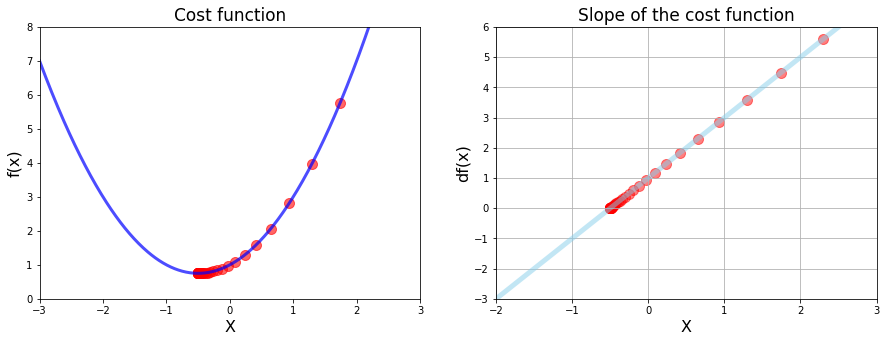

In [10]:
# Video 36 # Superimpose the gradient descent calculations on plot

plt.figure(figsize=[15,5] )

# Chart 1: Cost function
plt.subplot(1, 2, 1)

plt.xlim([-3, 3])
plt.ylim(0, 8)

plt.title('Cost function', fontsize = 17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize =16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.7)

#values = np.array(x_list)
plt.scatter(x_list, f(np.array(x_list)), color='red', s=100, alpha=0.6)

#Chart 2: derivative function

plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize = 17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize =16)
plt.grid()
plt.xlim([-2, 3])
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.5)

#slope_value = np.array(slope_list)

plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [11]:
# Make some data
x_2 = np.linspace(start=-2, stop=2, num=1000)

# Challenge: Write the g(x) and the dg(x) function in python?

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

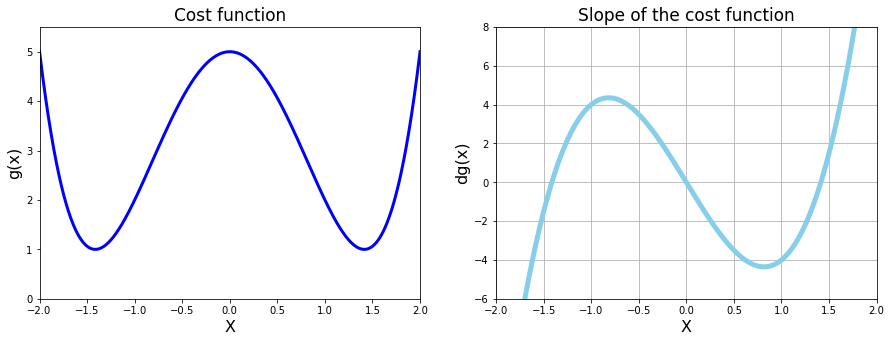

In [12]:
plt.figure(figsize=[15,5] )

# Chart 1: Cost function g(x)
plt.subplot(1, 2, 1)

plt.xlim([-2, 2])
plt.ylim(0, 5.5)

plt.title('Cost function', fontsize = 17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize =16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3)

#Chart 2: derivative function dg(x)

plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize = 17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize =16)
plt.grid()
plt.xlim([-2, 2])
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5)

plt.show()

## Gradient Descent as a Python Function

In [13]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter = 300):
    #To indent a full body of code you must select all the code you want to indent and press ctrl + ]
    new_x = initial_guess #Starting point
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]
    i=0
    for n in range(max_iter):
        i += 1
        previous_x = new_x # Step 1 make a prediction
        gradient = derivative_func(previous_x) # Step 2 Calculating error using the derivative function to get the slope.
        new_x = previous_x - multiplier * gradient #adjustment step for learning

        step_size = abs(new_x - previous_x) # This is to increase precision
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        #print(step_size)
        if step_size < precision:
            break 
    return new_x, x_list, slope_list

In [14]:
local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = 0.5, multiplier = 0.02, precision = 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.4122375085019094
Number of steps: 23


In [15]:
local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = -0.5)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4122375085019094
Number of steps: 23


In [16]:
local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = -0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4120887490901561
Number of steps: 34


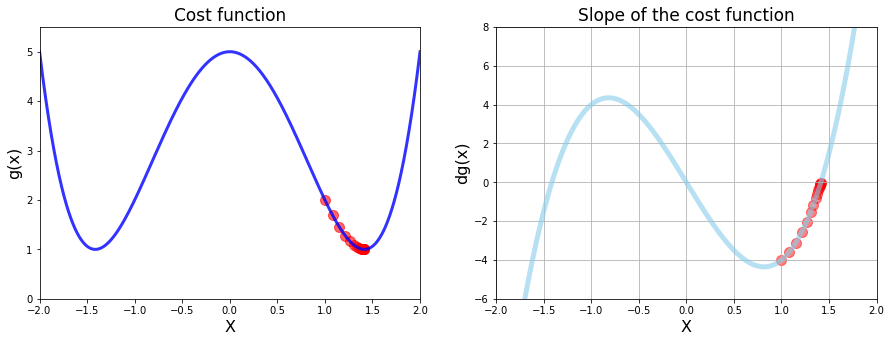

In [17]:
#Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = 1, multiplier=0.02)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15,5] )

# Chart 1: Cost function g(x)
plt.subplot(1, 2, 1)

plt.xlim([-2, 2])
plt.ylim(0, 5.5)

plt.title('Cost function', fontsize = 17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize =16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color= 'red', s=100, alpha=0.6)

#Chart 2: derivative function dg(x)

plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize = 17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize =16)
plt.grid()
plt.xlim([-2, 2])
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

# Example 3 - Divergence, Overflow and python Tuples

## $$h(x)=x^5-2x^4+2$$

In [18]:
# Make Data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

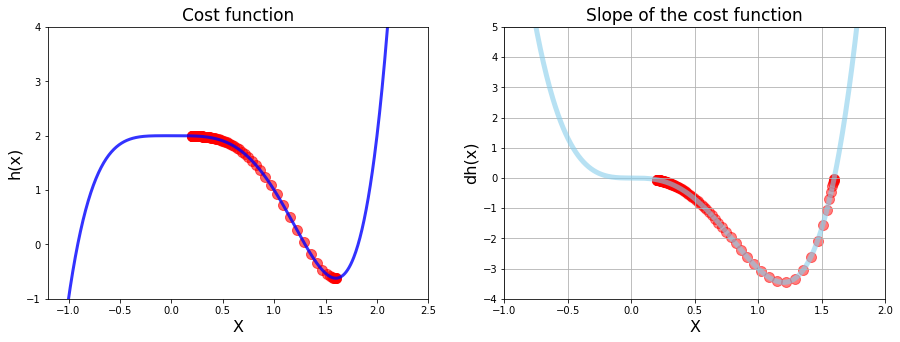

Local min occurs at: 1.5989534547394717
Cost at this minimum is:  -0.6214287992331258
Number of steps: 117


In [19]:
#Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func = dh, initial_guess = 0.2, multiplier=0.02, max_iter=500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15,5] )

# Chart 1: Cost function h(x)
plt.subplot(1, 2, 1)

plt.xlim([-1.2, 2.5])
plt.ylim(-1, 4)

plt.title('Cost function', fontsize = 17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize =16)
plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color= 'red', s=100, alpha=0.6)

#Chart 2: derivative function dh(x)

plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize = 17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize =16)
plt.grid()
plt.xlim([-1, 2])
plt.ylim(-4, 5)

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Local min occurs at:', local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of steps:', len(list_x))

In [20]:
import sys
#help(sys)
#sys.version
#type(h(local_min))
sys.float_info.max

1.7976931348623157e+308

## Python Tuples

In [21]:
# Creating a tuple - tuple packing
breakfast = 'bacon', 'eggs', 'avocado'
unlucky_numbers = 13, 4, 9, 26, 17

# Accessing tuple values. It's similar to how you access values from lists.
print('I loove ', breakfast[0])
print('My favorite number is:', unlucky_numbers[1])

not_my_address = 3, 'Mabits', 'Dobsi', 1799

tuple_with_single_value = 42,
print(tuple_with_single_value)
type(tuple_with_single_value)

main, side, greens = breakfast

print('Main ingredient is;', main)

data_tuple = gradient_descent(derivative_func=dh, initial_guess = 0.2, multiplier=0.08)
print('Local min is', data_tuple[0])
print('Cost at the last x value is', h(data_tuple[0]))
print('Number of steps is', len(data_tuple[1]))


I loove  bacon
My favorite number is: 4
(42,)
Main ingredient is; bacon
Local min is 1.5997318220501393
Cost at the last x value is -0.6214392637920572
Number of steps is 41


# The Learning Rate

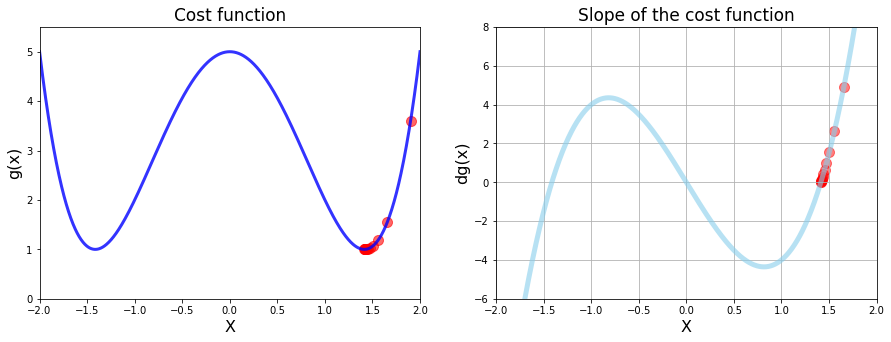

Local min is:  1.415879815113846
Cost value at this point is: 1.0000222373629084
Number of steps is: 14


In [22]:
#Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = 1.9, multiplier=0.02, max_iter=500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15,5] )

# Chart 1: Cost function g(x)
plt.subplot(1, 2, 1)

plt.xlim([-2, 2])
plt.ylim(0, 5.5)

plt.title('Cost function', fontsize = 17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize =16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color= 'red', s=100, alpha=0.6)

#Chart 2: derivative function dg(x)

plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize = 17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize =16)
plt.grid()
plt.xlim([-2, 2])
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Local min is: ', local_min)
print('Cost value at this point is:', g(local_min))
print('Number of steps is:', len(list_x))

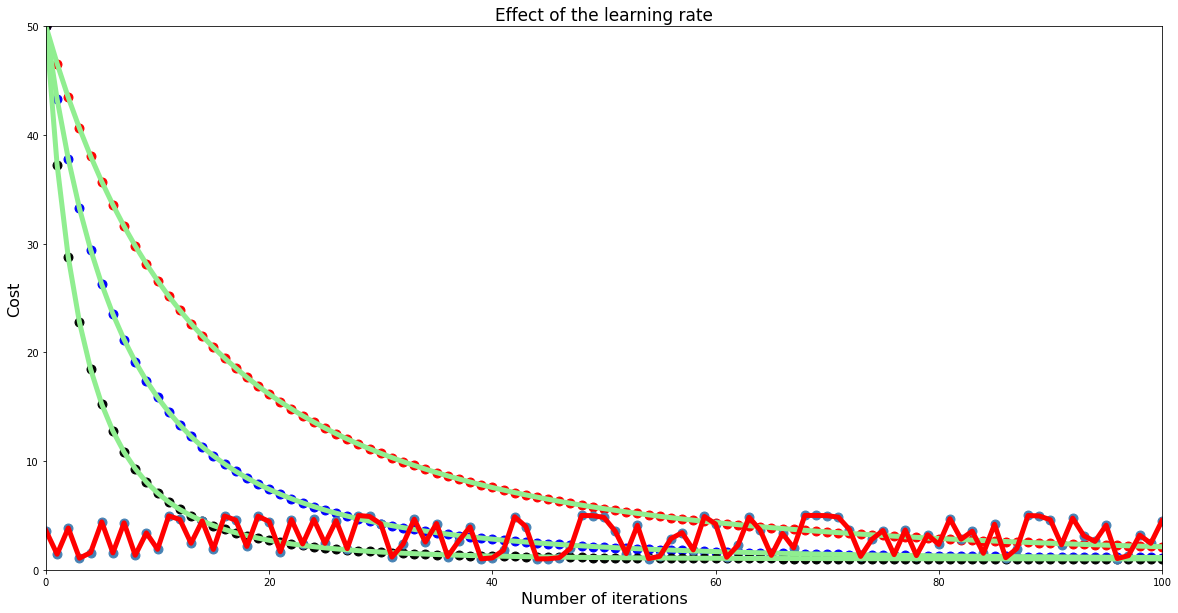

In [23]:
#Calling gradient descent function
n=100
low_gamma = gradient_descent(derivative_func = dg, initial_guess = 3, multiplier=0.0005, precision=0.0001, max_iter=n)

mid_gamma = gradient_descent(derivative_func = dg, initial_guess = 3, multiplier=0.001, precision=0.0001, max_iter=n)

high_gamma = gradient_descent(derivative_func = dg, initial_guess = 3, multiplier=0.002, precision=0.0001, max_iter=n)

#experiment to show the pitfalls of high learning rate.

insane_gamma = gradient_descent(derivative_func = dg, initial_guess = 1.9, multiplier=0.25, precision=0.0001, max_iter=n)

# Plotting reduction in cost for each iteration

plt.figure(figsize=[20,10] )

plt.xlim(0, n)
plt.ylim(0, 50)

plt.title('Effect of the learning rate', fontsize = 17)
plt.xlabel('Number of iterations', fontsize=16)
plt.ylabel('Cost', fontsize =16)

# Values for our charts
# 1) Y Axis Data: convert the lists to numpy arrays
low_values = np.array(low_gamma[1])

mid_values = np.array(mid_gamma[1])

high_values = np.array(high_gamma[1])

# x axis data: create a list from 0 to n+1
iteration_list = list(range(0, n+1))

#Plotting Low learning Rate
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(low_values), color= 'red', s=80)

#plotting Mid learning rate
plt.plot(iteration_list, g(mid_values), color='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(mid_values), color= 'blue', s=80)

#Plotting high learning rate
plt.plot(iteration_list, g(high_values), color='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(high_values), color= 'black', s=80)

#Plotting insane learning rate
plt.plot(iteration_list, g(np.array(insane_gamma[1])), color='red', linewidth=5)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), color= 'steelblue', s=80)

plt.show()

# Example 4 - Data Visualization with 3D Charts

## Minimise $$f(x,y) = \frac{1}{3^{-x^2 - y^2} +1}$$

Minimise $$f(x,y) = \frac{1}{r+1}$$ where $r$ is $3^{-x^2 - y^2}$

In [24]:
# My Function Attempt
#def f(x, y):
    #p = -x**2 -y**2
    #r = 3**p
    #return 1/(r+1)

# Instructor's version
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1/(r+1)

In [25]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)

print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


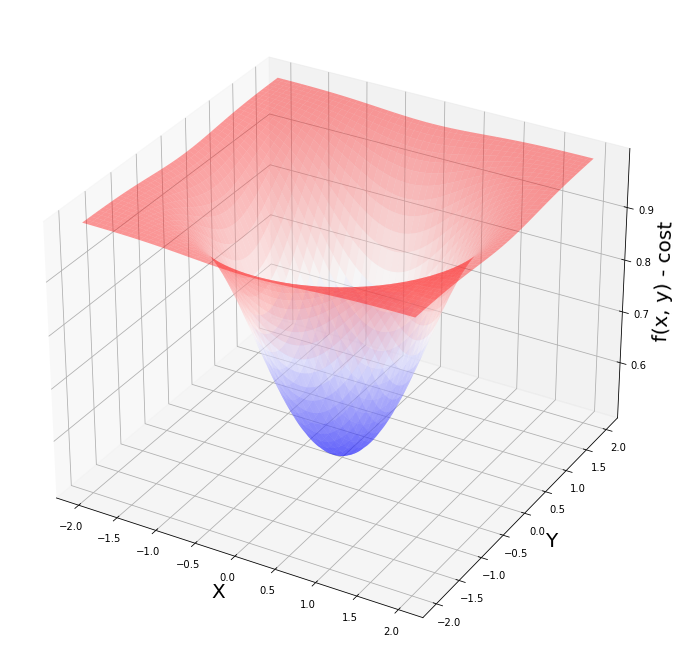

In [26]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.bwr, alpha=0.4)

plt.show()

## Partial Derivatives & Symbolic Computation

## $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2-y^2}}{\left( 3^{-x^2 -y^2}+1 \right) ^2}$$
## $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2-y^2}}{\left( 3^{-x^2 -y^2}+1 \right) ^2}$$

In [27]:
a, b = symbols('x, y')
diff(f(a, b), a)
print('Our cost function f(x, y) is: ', f(a, b))
print('Partial derivative with regards to x is: ', diff(f(a, b), a))
print('Value of f(x, y) at x=1.8 y=1.0 is: ',
      f(a, b).evalf(subs={a:1.8, b:1.0})) # Calculating the cost at a particular point in our function.
print('Value of partial derivative with regards to x: ', diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(x, y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative with regards to x is:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x, y) at x=1.8 y=1.0 is:  0.990604794032582
Value of partial derivative with regards to x:  0.0368089716197505


## Batch Gradient Descent with Sympy

In [28]:
# Setup - These will be your learning rate aka(multiplier) as well as the max_iter(aka Maximum number of iterations)
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is:', f(params[0], params[1]))


Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
The cost is: 0.500000000000000


In [29]:
# Partial derivative function of x
def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*math.log(3)*r/(r+1)**2

#partial derivative function of y
def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*math.log(3)*r/(r+1)**2

In [30]:
# Setup - These will be your learning rate aka(multiplier) as well as the max_iter(aka Maximum number of iterations)
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is:', f(params[0], params[1]))


Values in gradient array [0.00046144 0.00025636]
Minimum occurs at x value of:  0.0007938985101347202
Minimum occurs at y value of:  0.0004410547278526219
The cost is: 0.5000002265349848


## Graphing 3D Gradient Descent & Advanced Numpy Arrays

In [31]:
# 1. In this section we are modifying the code to check how the parameters change as the loop runs.
multiplier = 0.1 
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1,2) # variable/object for values of the parameters as they change in the loop.
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients 
    #values_array = np.append(values_array, params.reshape(1, 2), axis = 0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is:', f(params[0], params[1]))


(1, 2)
Values in gradient array [0.00046144 0.00025636]
Minimum occurs at x value of:  0.0007938985101347202
Minimum occurs at y value of:  0.0004410547278526219
The cost is: 0.5000002265349848


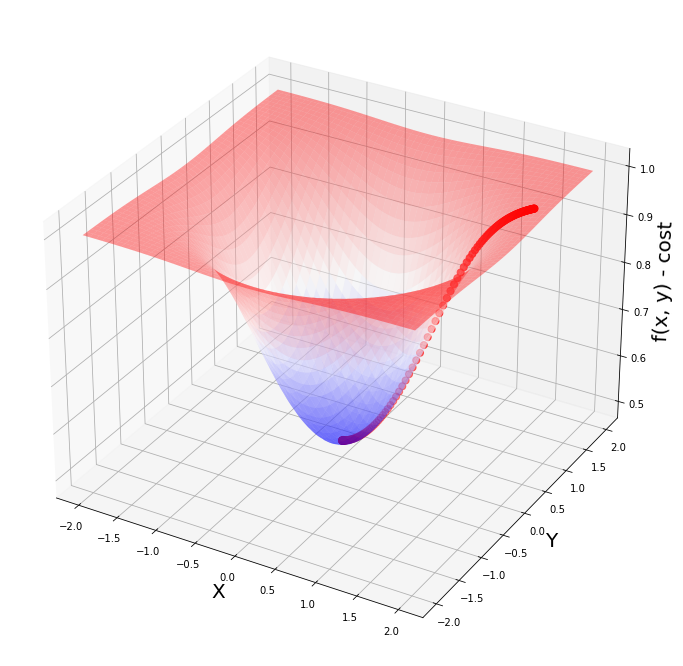

In [32]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.bwr, alpha=0.4)
ax.scatter(values_array[:,0], values_array[:,1], f(values_array[:,0], values_array[:,1]), s=50, color='red')

plt.show()

In [33]:
# Advanced Numpy array Practice:

kirk = np.array([['Captain', 'Guitar']]) # This array has 1 row and 2 columns.
print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'], ['Questlove', 'Drums']]) # This array will have 2 rows and 2 columns
print(hs_band.shape)
print('hs_band[0]: ', hs_band[0])
print('hs_band[1][0]: ',hs_band[1][0])

the_roots = np.append(arr=hs_band, values=kirk, axis=0) #The axis is 0 for row, 1 for column # Array values appending
print(the_roots)

the_roots = np.append(arr=the_roots, values=[['Malik B', 'MC']], axis=0)
print('printing nicknames...', the_roots[:,0])
print('printing band roles...', the_roots[:,1])

(1, 2)
(2, 2)
hs_band[0]:  ['Black Thought' 'MC']
hs_band[1][0]:  Questlove
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
printing nicknames... ['Black Thought' 'Questlove' 'Captain' 'Malik B']
printing band roles... ['MC' 'Drums' 'Guitar' 'MC']


# Example 5 - Working with Data and a Real Cost Function

## Mean Squared Error: a cost function for regression problems

### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [34]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose() # Making array 2 dimensional, This is how you ([[]]).transpose.
#y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(len(y_5), 1) # You can also reshape them into 2D using reshape(row,column)
y_5 = np.array([[1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]]).transpose()
print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)


Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [35]:
# Quick linear regression
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0: ', regr.intercept_[0])
print('Theta 1: ', regr.coef_[0][0])

Theta 0:  0.8475351486029536
Theta 1:  1.2227264637835915


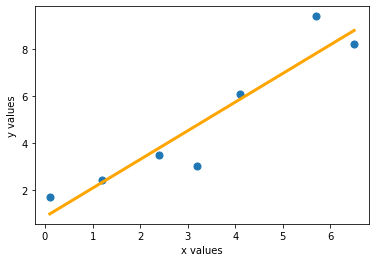

In [36]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')

plt.show()

In [37]:
# y_hat = theta0 + theta1*x
y_hat = 0.8475351486029536 + 1.2227264637835915*x_5
print('Estimated values for y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Estimated values for y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [38]:
def mse(y, y_hat):
    #mse_calc = 1/7 * sum((y-y_hat)**2) This one is not flexible.
    #mse_calc = 1/len(y) * sum((y-y_hat)**2) This one is is better.
    #mse_calc = (1/y.size) * sum((y-y_hat)**2) # This is new and seems better that the above.
    mse_calc = np.average((y-y_hat)**2, axis=0)
    return mse_calc

In [39]:
print('Manually calculated MSE is:', mse(y_5, y_hat)[0])
print('SKlearn calculated MSE is:', mean_squared_error(y_5, y_hat))
print('MSE regression is:', mean_squared_error(y_5, regr.predict(x_5)))

Manually calculated MSE is: 0.9479655759794577
SKlearn calculated MSE is: 0.9479655759794577
MSE regression is: 0.9479655759794577


## 3D Plot for the MSE Cost Function

### Make data for thetas

In [40]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)
plot_t0

array([[-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       ...,
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ]])

### Calc MSE using nested for loops

In [41]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat) #Plot cost now holds the prediction.

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


In [42]:
y_hat

array([[ 3.3],
       [ 6.6],
       [10.2],
       [12.6],
       [15.3],
       [20.1],
       [22.5]])

In [43]:
# Nested loop practice
for i in range(3):
    for j in range(3):
        print(f'value of i is{i} and j is{j}')

value of i is0 and j is0
value of i is0 and j is1
value of i is0 and j is2
value of i is1 and j is0
value of i is1 and j is1
value of i is1 and j is2
value of i is2 and j is0
value of i is2 and j is1
value of i is2 and j is2


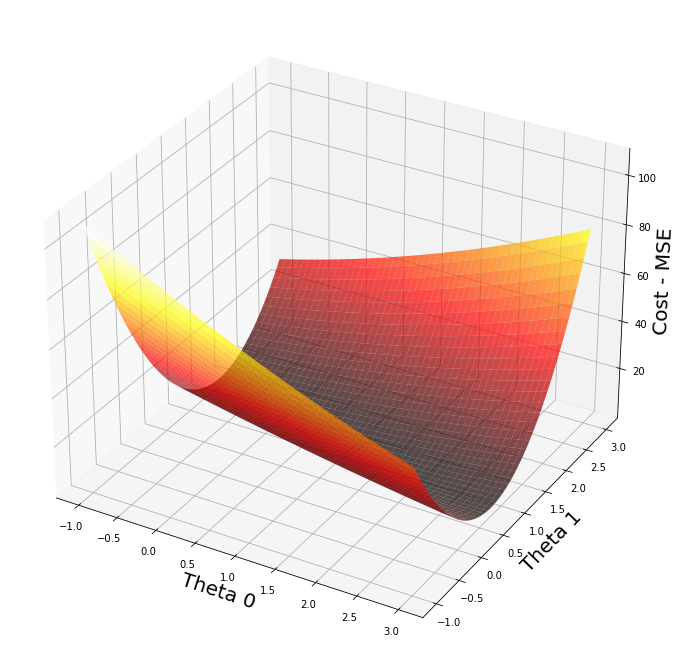

In [44]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12]) #Graph set up
ax = fig.gca(projection='3d') # Allows us to graph in 3D

ax.set_xlabel('Theta 0', fontsize = 20)
ax.set_ylabel('Theta 1', fontsize = 20)
ax.set_zlabel('Cost - MSE', fontsize = 20)

ax.plot_surface(plot_t0, plot_t1, plot_cost,  cmap=cm.hot, alpha=0.7)
#ax.scatter(plot_cost[:,0], plot_cost[:,1], )

plt.show()

In [45]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), dims=plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 and plot_t0[111][91]', plot_t0[111][91])
print('Min MSE for Theta 1 and plot_t1[111][91]', plot_t1[111][91])

Min value of plot_cost 0.9483826526747164
Min occurs at (i,j): (111, 91)
Min MSE for Theta 0 and plot_t0[111][91] 0.829145728643216
Min MSE for Theta 1 and plot_t1[111][91] 1.2311557788944723


<ipython-input-45-ee487430316e>:2: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  ij_min = np.unravel_index(indices=plot_cost.argmin(), dims=plot_cost.shape)


## Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = -\frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) $$

## $$\frac{\partial MSE}{\partial \theta_1} = -\frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big(x^{(i)} \big) $$

## MSE & Gradient Descent

In [46]:
# The inputs are x values, y values, array of theta parameters(theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n= y.size
    theta0_slope = (-2/n) * sum(y-thetas[0]-thetas[1]*x)
    theta1_slope = (-2/n) * sum((y-thetas[0]-thetas[1]*x)*x)
    
    #return np.array([theta-_slope[0], theta1_slope[0]]) 
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [47]:
multiplier = 0.01
thetas = np.array([2.9, 2.9]) 

# Collect data points for scatter plot
plot_vals = thetas.reshape(1,2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    #Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1,2)))
    mse_vals = np.append(arr = mse_vals, values = mse(y_5, thetas[0] + thetas[1]*x_5), axis=0)

#results
#print('Gradient', )
print('Minimum at Theta0 occurs at:', thetas[0])
print('Minimum at Theta1 occurs at:', thetas[1])
print('Cost', mse(y_5, thetas[0]+thetas[1]*x_5))

Minimum at Theta0 occurs at: 0.8532230461743415
Minimum at Theta1 occurs at: 1.2214935332607393
Cost [0.94797511]


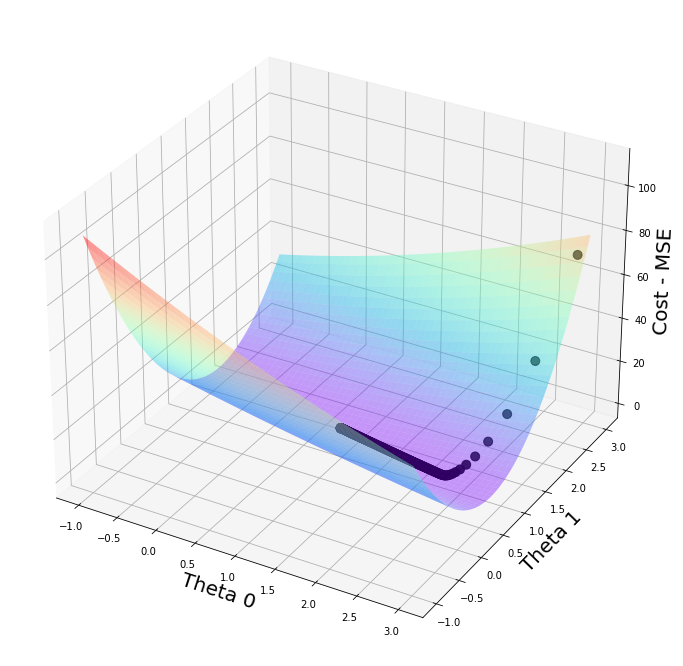

In [48]:
fig = plt.figure(figsize=[16, 12]) #Graph set up
ax = fig.gca(projection='3d') # Allows us to graph in 3D

ax.set_xlabel('Theta 0', fontsize = 20)
ax.set_ylabel('Theta 1', fontsize = 20)
ax.set_zlabel('Cost - MSE', fontsize = 20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1],  mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost,  cmap=cm.rainbow, alpha=0.4)

plt.show()

In [49]:
vals.get_estimate(rm=3, ptratio=15, chas=True)

The esimate at the 95% prediction interval.
The estimate price is $533000.0.
The lower range is $367000.0 and the upper range is $776000.0
